## Importing Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2        ## image processing liberary

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm import tqdm

## Data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

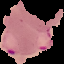

In [11]:
load_img(r"C:\Users\user\Downloads\archive\Malarial Cell Image Data\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_47.png",target_size=(64,64))

In [12]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [15]:
image_dir = r"C:\Users\user\Downloads\archive\Malarial Cell Image Data\cell_images"
size = 64
dataset = []
label = []

Here both type of image must be same else our model goes under underfitting or overfitting

In [18]:
parasitized_img = os.listdir(image_dir+"\\Parasitized")
parasitized_img = parasitized_img[:4133]
for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Parasitized\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(0)

100%|██████████| 4133/4133 [00:05<00:00, 763.43it/s]


In [17]:
uninfected_img = os.listdir(image_dir+"\\Uninfected")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Uninfected\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

100%|██████████| 4133/4133 [00:07<00:00, 524.86it/s]


In [19]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2 ,random_state = 0)

## CNN Architechture

In [20]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [21]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [22]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 64s 226ms/step - accuracy: 0.6935 - loss: 0.6772 - val_accuracy: 0.4490 - val_loss: 2.3597
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.8859 - loss: 0.2749 - val_accuracy: 0.9388 - val_loss: 0.2136
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.9265 - loss: 0.1885 - val_accuracy: 0.9411 - val_loss: 0.1739
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 54s 218ms/step - accuracy: 0.9428 - loss: 0.1536 - val_accuracy: 0.9315 - val_loss: 0.1890
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.9492 - loss: 0.1310 - val_accuracy: 0.9326 - val_loss: 0.1822
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.9526 - loss: 0.1172 - val_accuracy: 0.9473 - val_loss: 0.1385
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 55s 222ms/step - accuracy: 0.9582 - loss: 0.1068 - val_accuracy: 0.9411 - val_loss: 0.1654
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.9627 - loss: 0

### To make model more accurate increase the epoch and add more layer of con,pool,norm,drop .

In [23]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9559 - loss: 0.1153
Test accuracy: 95.76%


In [24]:
model.save(r"C:\Users\user\Downloads\archive\Malarial Cell Image Data\cell_images.h5")

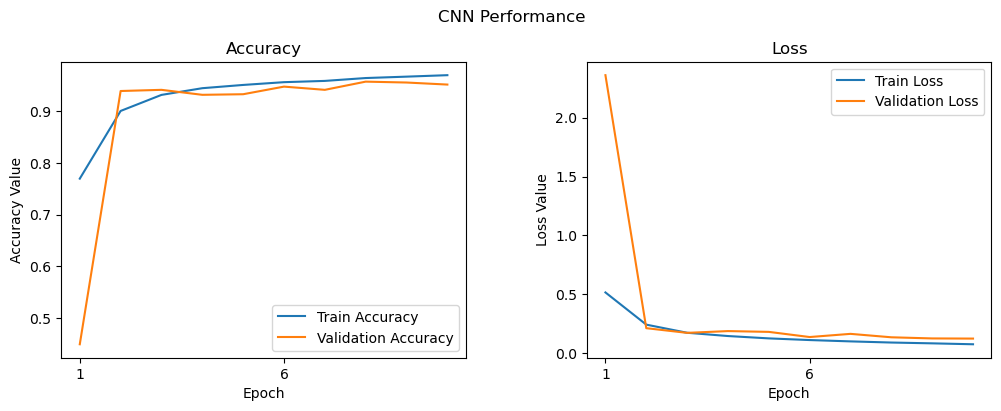

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

plt.show()